<a href="https://colab.research.google.com/github/chitransh-singhal/Deep-Learning/blob/master/Cifar10_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Cifar10-Classification

cifar 10 Image classification using CNN<br>
Classify the Images of the Cifar-10 Dataset using CNN

Importing the modules

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from keras.layers import Input, Conv2D, Dense, Flatten, Dropout
from keras.layers import GlobalMaxPooling2D, MaxPooling2D, BatchNormalization
from keras.models import Model, Sequential

Loading the image data

In [4]:
cifar10 = keras.datasets.cifar10

In [5]:
(x_train,y_train),(x_test,y_test) = cifar10.load_data()
x_train.shape

170498071/170498071 [==============================] - 4s 0us/step


(50000, 32, 32, 3)

Normalisation of images

In [6]:
x_train, x_test = x_train/255.0, x_test/255.0

y_train, y_test = y_train.flatten(), y_test.flatten()

sample image

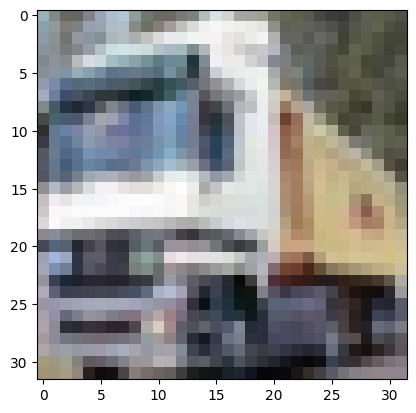

In [7]:
plt.imshow(x_train[1])

Defining the model

In [8]:
model = Sequential([
    Conv2D(32, (3,3), activation='relu', padding='same', input_shape = x_train[0].shape),
    BatchNormalization(),
    Conv2D(32, (3,3), activation='relu', padding='same'),
    MaxPooling2D((2,2)),
    Conv2D(64, (3,3), activation='relu', padding='same'),
    BatchNormalization(),
    Conv2D(64, (3,3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D((2,2)),
    Conv2D(128, (3,3), activation='relu', padding='same'),
    BatchNormalization(),
    Conv2D(128, (3,3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D((2,2)),
    Flatten(),
    Dropout(0.2),
    Dense(1024, activation='relu'),
    Dropout(0.2),
    Dense(10,activation='softmax')
])

Model Compilation using the loss as sparse categorical crossentropy

In [9]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=["accuracy"])

Training the model

In [10]:
r = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=25)

Epoch 1/25
1563/1563 [==============================] - 294s 187ms/step - loss: 1.2897 - accuracy: 0.5579 - val_loss: 1.1026 - val_accuracy: 0.6149
Epoch 2/25
1563/1563 [==============================] - 262s 167ms/step - loss: 0.8422 - accuracy: 0.7081 - val_loss: 0.8990 - val_accuracy: 0.6934
Epoch 3/25
1563/1563 [==============================] - 262s 168ms/step - loss: 0.6966 - accuracy: 0.7608 - val_loss: 0.9319 - val_accuracy: 0.6955
Epoch 4/25
1563/1563 [==============================] - 269s 172ms/step - loss: 0.5937 - accuracy: 0.7974 - val_loss: 0.6854 - val_accuracy: 0.7686
Epoch 5/25
1563/1563 [==============================] - 261s 167ms/step - loss: 0.5136 - accuracy: 0.8254 - val_loss: 0.7104 - val_accuracy: 0.7659
Epoch 6/25
1563/1563 [==============================] - 261s 167ms/step - loss: 0.4308 - accuracy: 0.8512 - val_loss: 0.6947 - val_accuracy: 0.7803
Epoch 7/25
1563/1563 [==============================] - 262s 168ms/step - loss: 0.3641 - accuracy: 0.8725 - val_

Evaluating the model

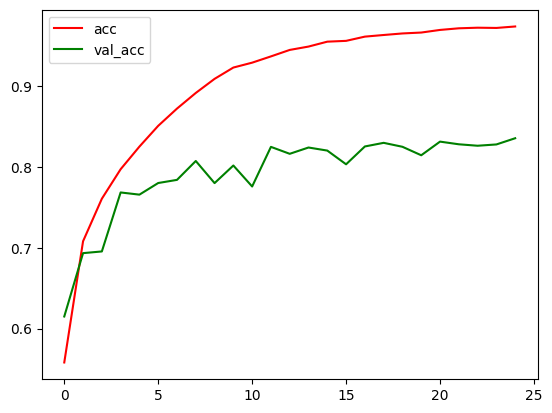

In [11]:
plt.plot(r.history['accuracy'], label='acc', color='red')
plt.plot(r.history['val_accuracy'], label='val_acc', color='green')
plt.legend()